# Trabalho 1 - Influência dos zeros de um sistema
### Aicha Al-Rob, 20102083



In [82]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import control as ctrl

In [83]:
#
def encontrar_parametros(num, den):
    if len(den) != 3 or abs(den[0]) < 1e-6:
        print("O denominador deve ser um polinômio de segundo grau na forma a2*s^2 + a1*s + a0 com a2 diferente de zero.")
        return np.nan, np.nan, np.nan
    a2, a1, a0 = den
    wn = np.sqrt(a0 / a2)
    zeta = (a1/a2) / (2*wn)
    K = ctrl.dcgain(ctrl.TransferFunction(num, den))
    return wn, zeta, K

def constr_expr(coeffs, s):
    coeffs = list(coeffs)
    n = len(coeffs)
    return sum(c * s**i for i, c in enumerate(reversed(coeffs)))

# Gera eixo de tempo simples: 5 vezes a constante de tempo do polo mais lento.
def auto_eixo_tempo(den):
    polos = np.roots(den)
    re = np.real(polos)
    if len(re)>0:
        tau = max(-1/re[re<0]) if np.any(re<0) else 5
        T_end = 5*tau
    else:
        T_end = 10
    return np.linspace(0,T_end,800)

In [84]:
s = sympy.symbols('s', complex=True)
systems = {}
den_commum = np.polymul([1, 1], [5, 1])  # Denominador comum (1+s)(1+5s) = 5s^2 + 6s + 1
systems['(a) 1/((1+s)(1+5s))'] = ([1], den_commum)
systems['(b) 10/((1+s)(1+5s))'] = ([1, 0], den_commum)
systems['(c) 8s/((1+s)(1+5s))'] = ([8,0], den_commum)
systems['(d) (1+8s)/((1+s)(1+5s))'] = ([1,8], den_commum)
systems['(e) (1+80s)/((1+s)(1+5s))'] = ([1,80], den_commum)
systems['(f) (1+0.08s)/((1+s)(1+5s))'] = ([1,0.08], den_commum)
systems['(g) (1-2s)/((1+s)(1+5s))'] = ([1,-2], den_commum)
systems['(h) 4(1+6.5s+3.75s^2)/((1+s)(1+5s))'] = (np.polymul([4], [1,6.5,3.75]).tolist(), den_commum)

den_i = [0.01, 0.02, 1.0]  # 0.01 s^2 + 0.02 s + 1
systems['(i) 1/(1+0.02s+0.01s^2)'] = ([1], den_i)
systems['(j) (1+8s)/(1+0.02s+0.01s^2)'] = ([1,8], den_i)


print("total de sistemas:", len(systems))


total de sistemas: 10


In [85]:
for key in systems:
    num, den = systems[key]
    G = ctrl.TransferFunction(num, den)
    wn, zeta, K = encontrar_parametros(num, den)
    print(f"\nSistema {key}:")
    print(f"G(s) = {G}")
    print(f"Sistema {key}: K={K:.3f}, ωn={wn:.4f}, ζ={zeta:.4f}")



Sistema (a) 1/((1+s)(1+5s)):
G(s) = <TransferFunction>: sys[434]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         1
  ---------------
  5 s^2 + 6 s + 1
Sistema (a) 1/((1+s)(1+5s)): K=1.000, ωn=0.4472, ζ=1.3416

Sistema (b) 10/((1+s)(1+5s)):
G(s) = <TransferFunction>: sys[436]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         s
  ---------------
  5 s^2 + 6 s + 1
Sistema (b) 10/((1+s)(1+5s)): K=0.000, ωn=0.4472, ζ=1.3416

Sistema (c) 8s/((1+s)(1+5s)):
G(s) = <TransferFunction>: sys[438]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        8 s
  ---------------
  5 s^2 + 6 s + 1
Sistema (c) 8s/((1+s)(1+5s)): K=0.000, ωn=0.4472, ζ=1.3416

Sistema (d) (1+8s)/((1+s)(1+5s)):
G(s) = <TransferFunction>: sys[440]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       s + 8
  ---------------
  5 s^2 + 6 s + 1
Sistema (d) (1+8s)/((1+s)(1+5s)): K=8.000, ωn=0.4472, ζ=1.3416

Sistema (e) (1+80s)/((1+s)(1+5s)):
G(s) = <TransferFunction>: sys[442]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      s


Sistema (a) 1/((1+s)(1+5s)):


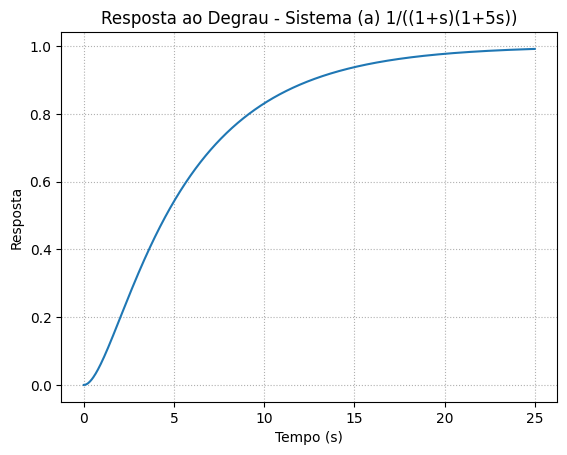

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


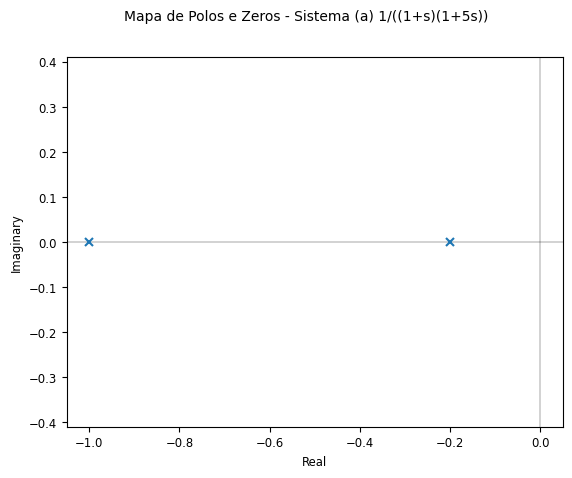

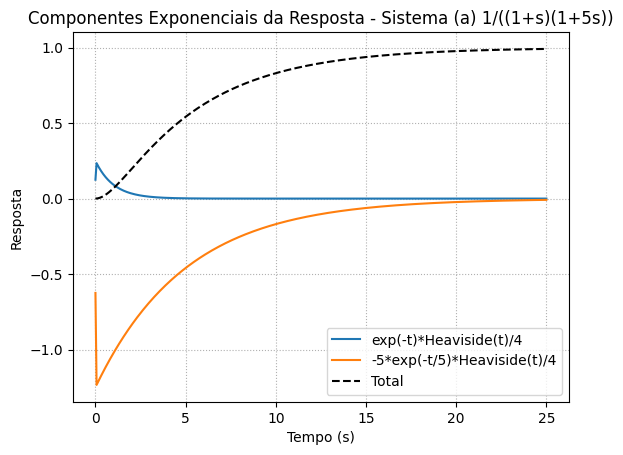


Sistema (b) 10/((1+s)(1+5s)):


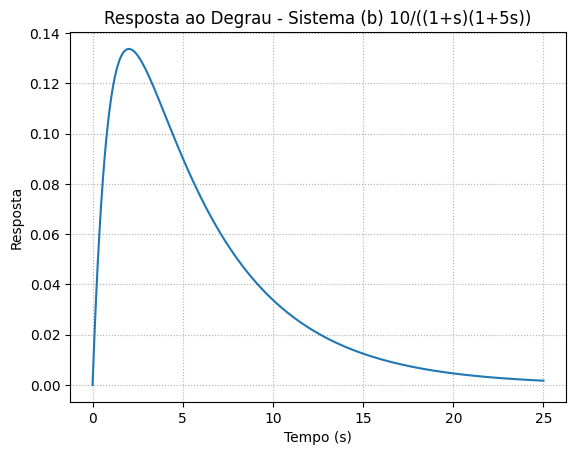

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


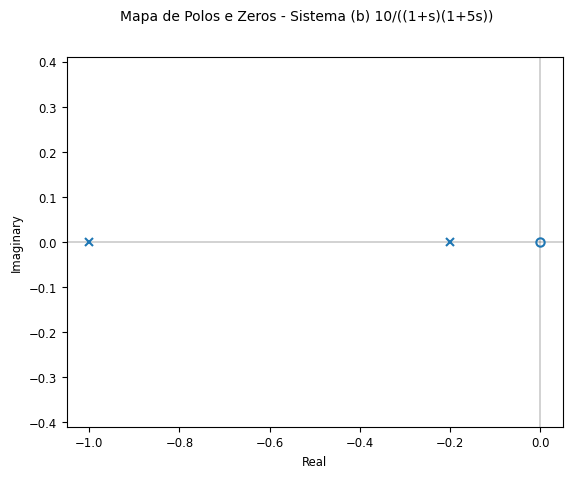

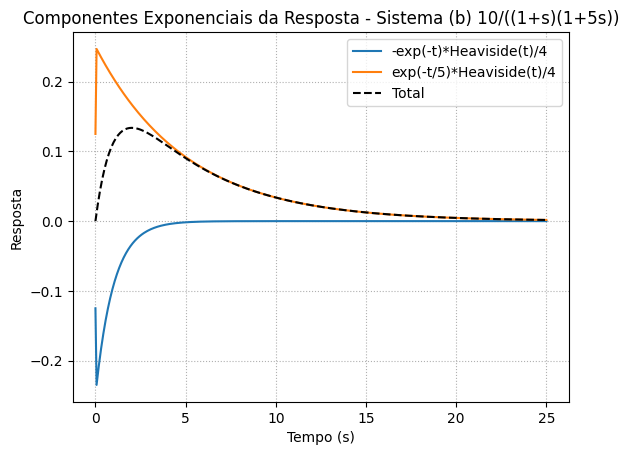


Sistema (c) 8s/((1+s)(1+5s)):


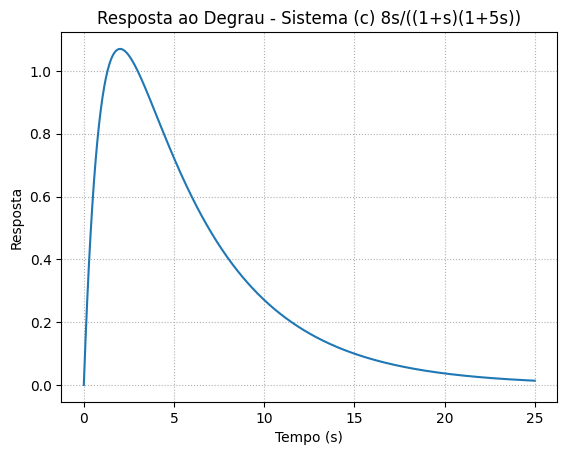

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


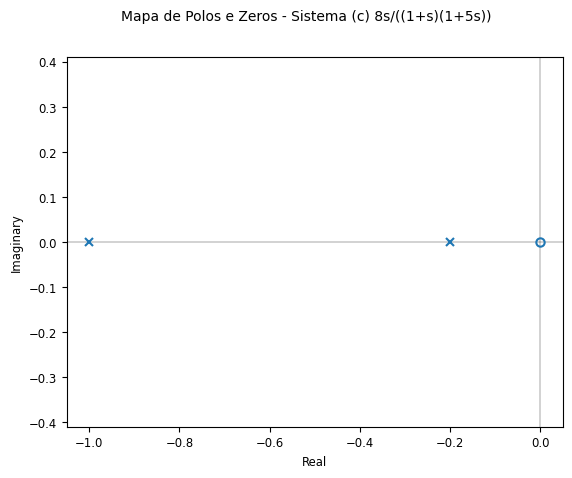

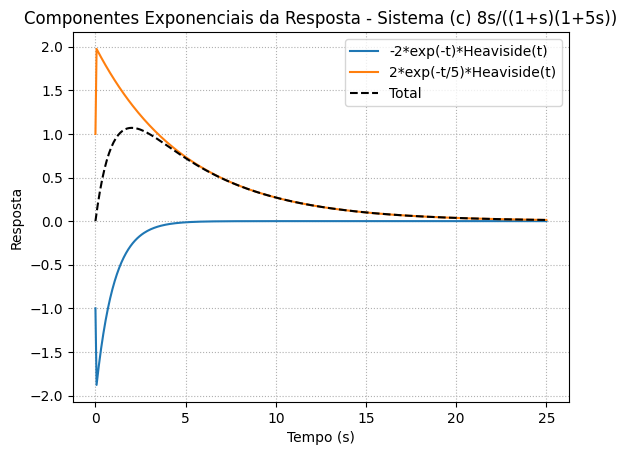


Sistema (d) (1+8s)/((1+s)(1+5s)):


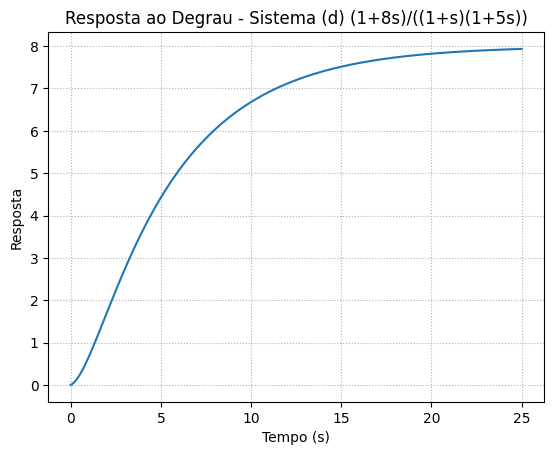

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


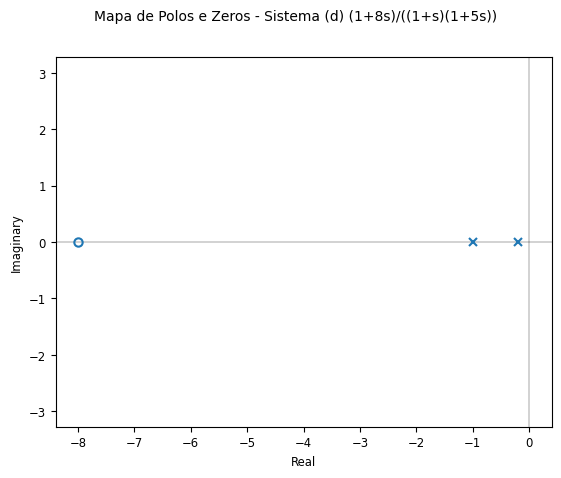

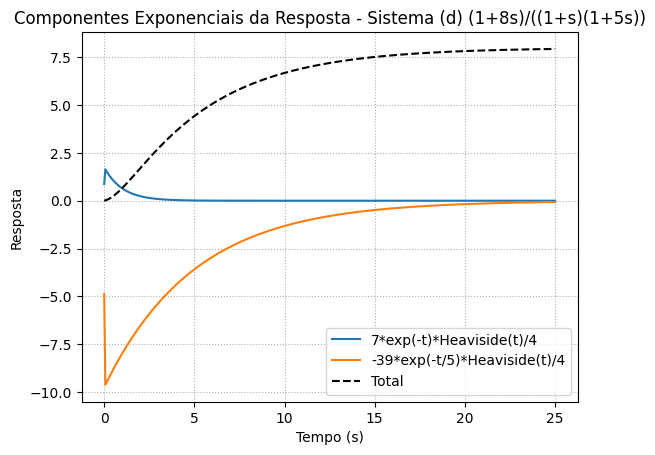


Sistema (e) (1+80s)/((1+s)(1+5s)):


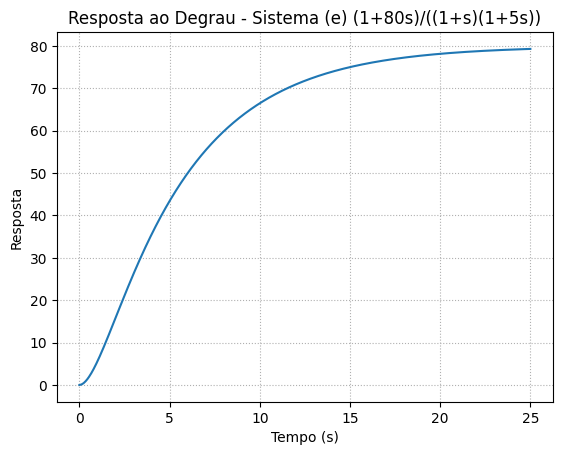

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


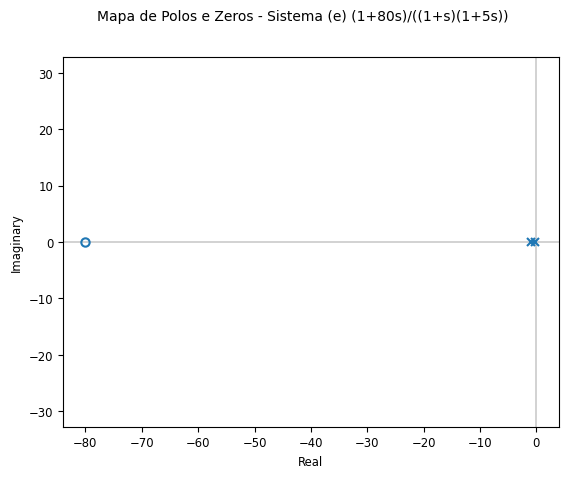

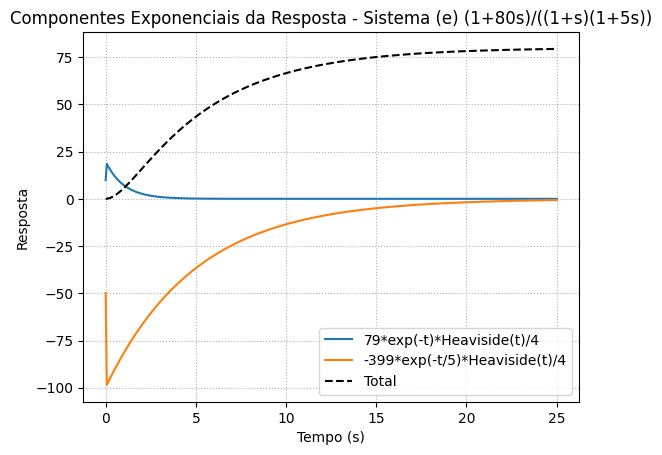


Sistema (f) (1+0.08s)/((1+s)(1+5s)):


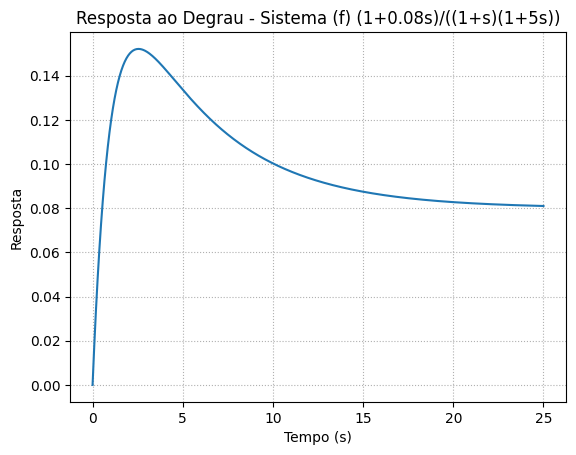

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


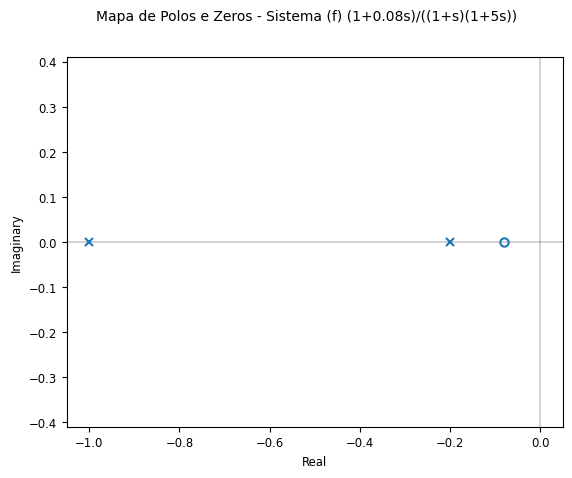

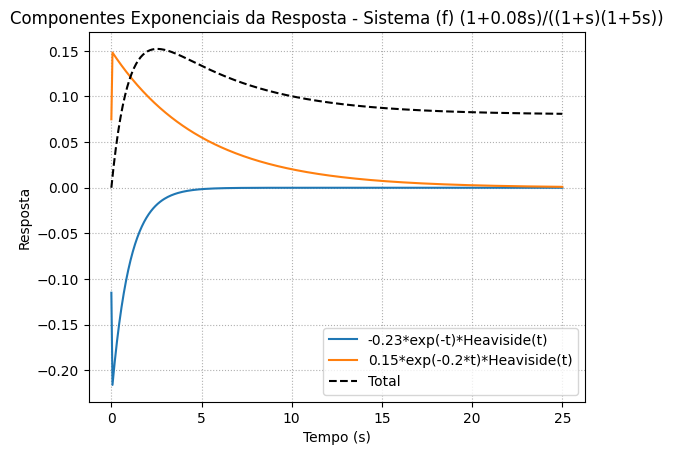


Sistema (g) (1-2s)/((1+s)(1+5s)):


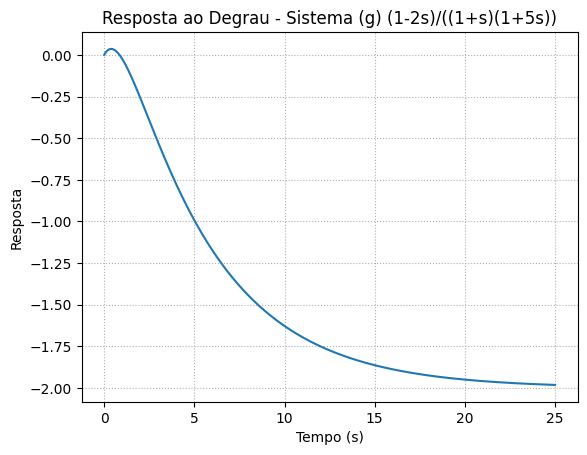

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


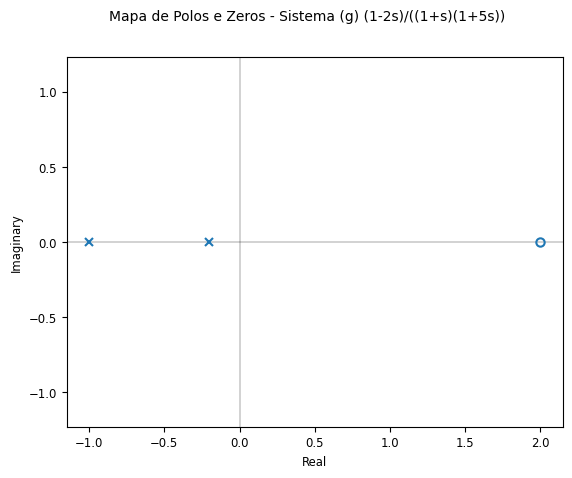

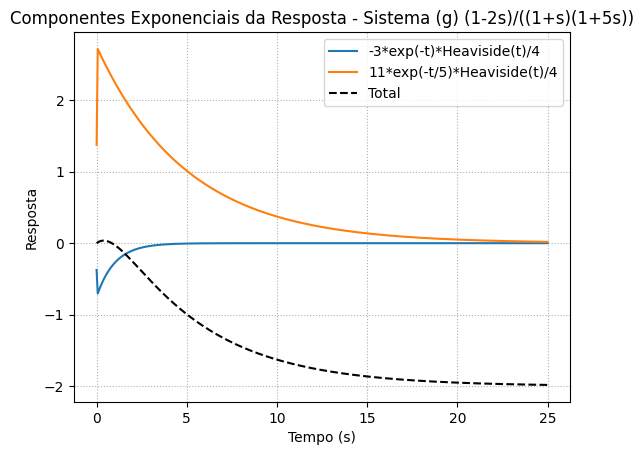


Sistema (h) 4(1+6.5s+3.75s^2)/((1+s)(1+5s)):


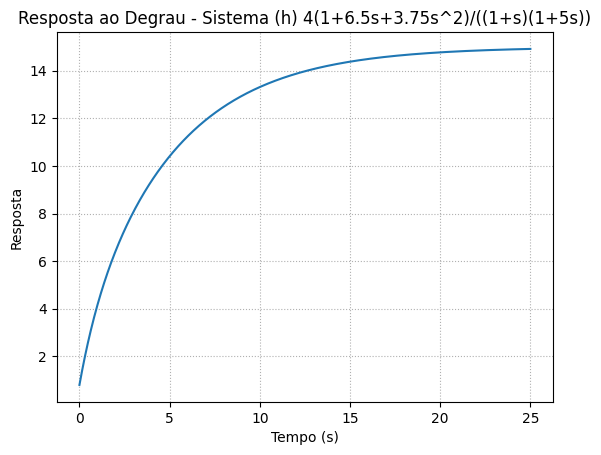

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


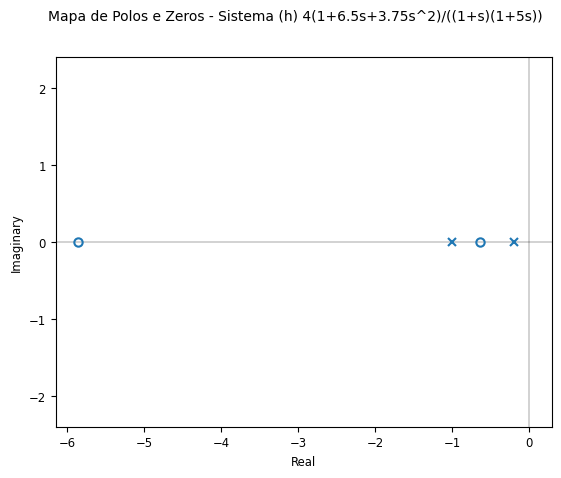

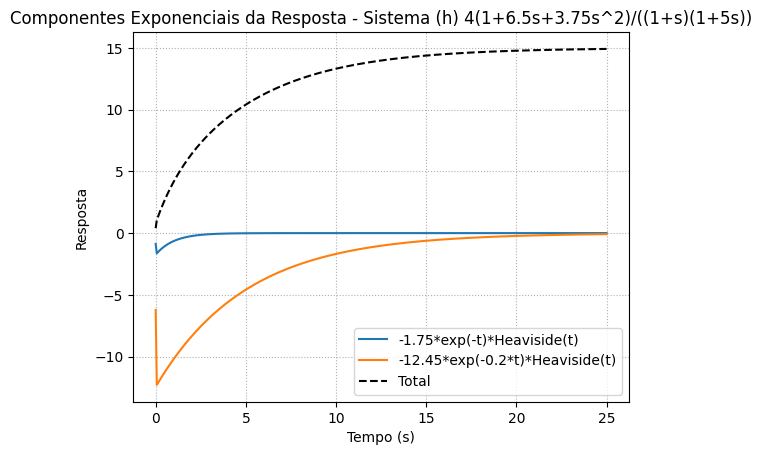


Sistema (i) 1/(1+0.02s+0.01s^2):


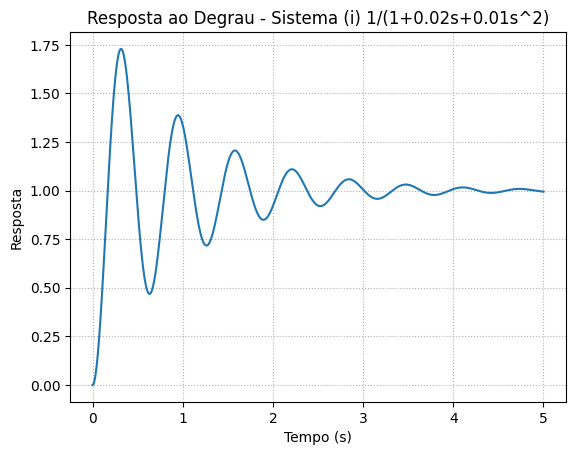

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


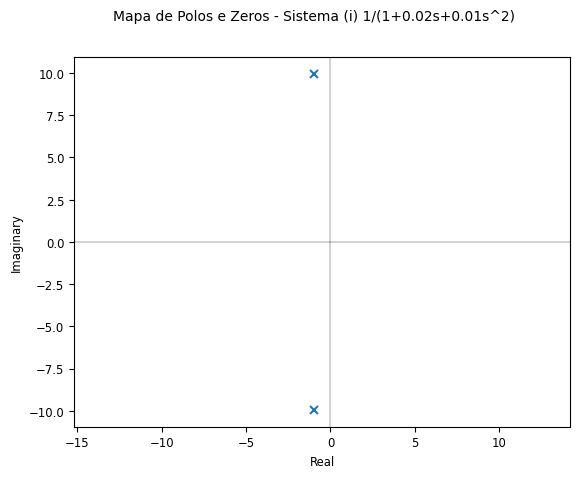

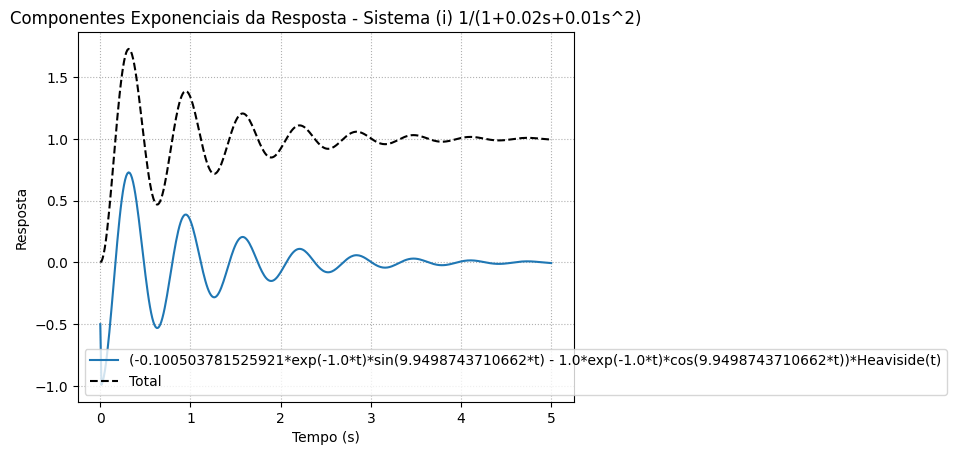


Sistema (j) (1+8s)/(1+0.02s+0.01s^2):


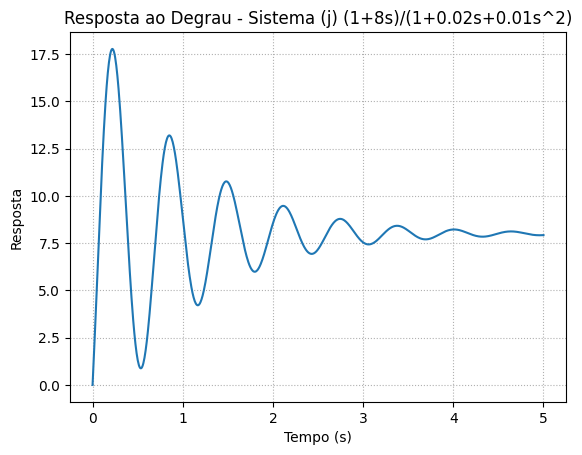

/usr/local/lib/python3.11/site-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


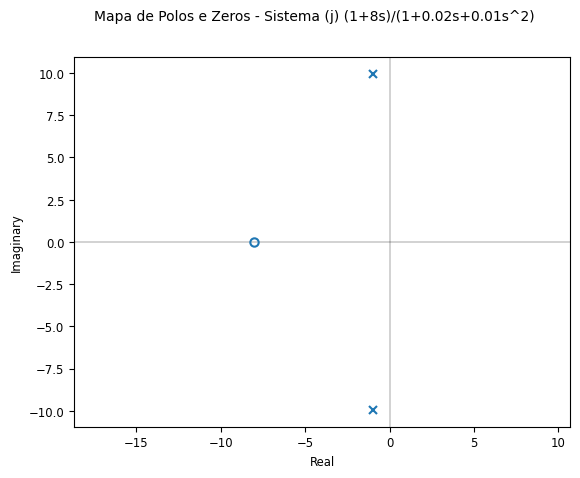

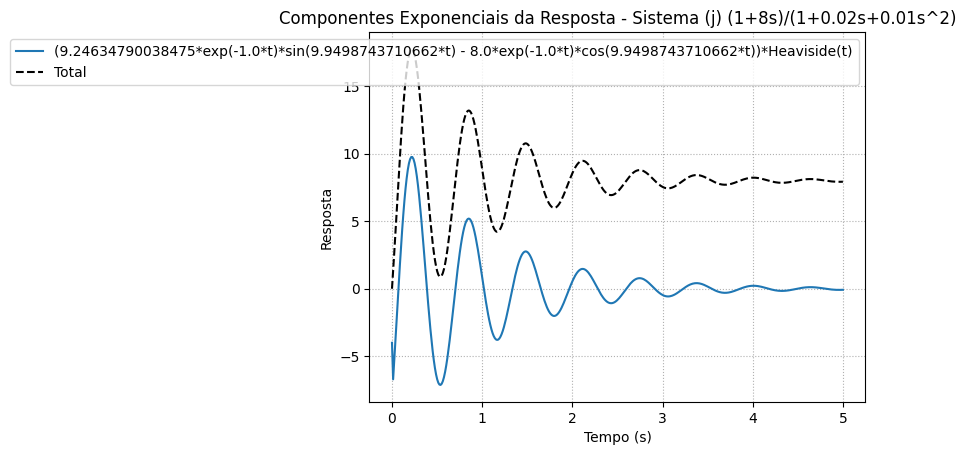

In [86]:
exprs = {}
s, t = sympy.symbols('s t', real=True)
for key in systems:
    print(f"\nSistema {key}:")
    num, den = systems[key]
    G = ctrl.TransferFunction(num, den)
    T = auto_eixo_tempo(den)
    expr_num = constr_expr(num, s)
    tout, yout = ctrl.step_response(G, T=T)
    plt.figure();
    plt.plot(tout, yout)
    plt.title(f"Resposta ao Degrau - Sistema {key}")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Resposta")
    plt.grid(True, ls=":")
    plt.show()

    plt.figure()
    ctrl.pzmap(G, plot=True, title=f"Mapa de Polos e Zeros - Sistema {key}")
        # resposta simbólica
    num_expr = sum(c * s**i for i, c in enumerate(reversed(num)))
    den_expr = sum(c * s**i for i, c in enumerate(reversed(den)))

    Y = num_expr / den_expr * 1/s  # Degrau unitário em Laplace
    y_t = sympy.inverse_laplace_transform(Y, s, t)
    exprs[key] = y_t
    terms = y_t.as_ordered_terms()
    Tvals = np.linspace(0, tout[-1], 400)
    plt.figure()
    for term in terms:
        if term.has(sympy.exp):
            f = sympy.lambdify(t, term, modules='numpy')
            plt.plot(Tvals, f(Tvals), label=str(term))
    ftotal = sympy.lambdify(t, y_t, modules='numpy')
    plt.plot(Tvals, ftotal(Tvals), 'k--', label='Total')
    plt.title(f"Componentes Exponenciais da Resposta - Sistema {key}")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Resposta")
    plt.grid(True, ls=":")
    plt.legend()
    plt.show()

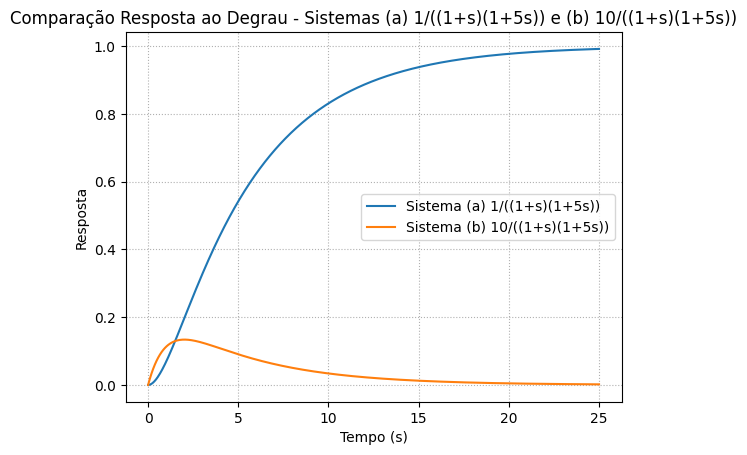

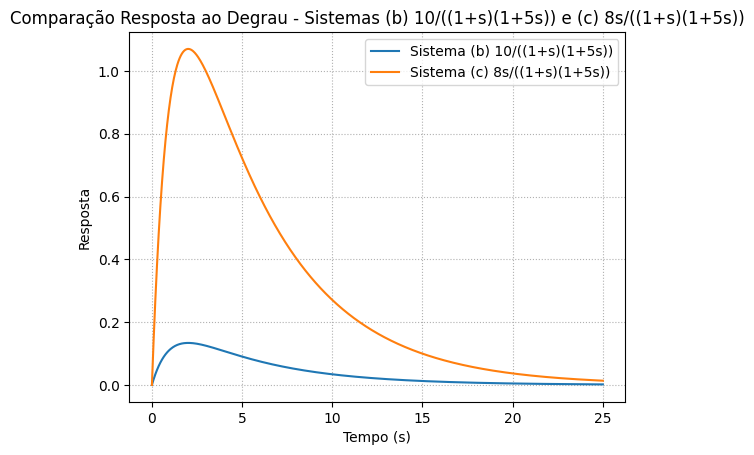

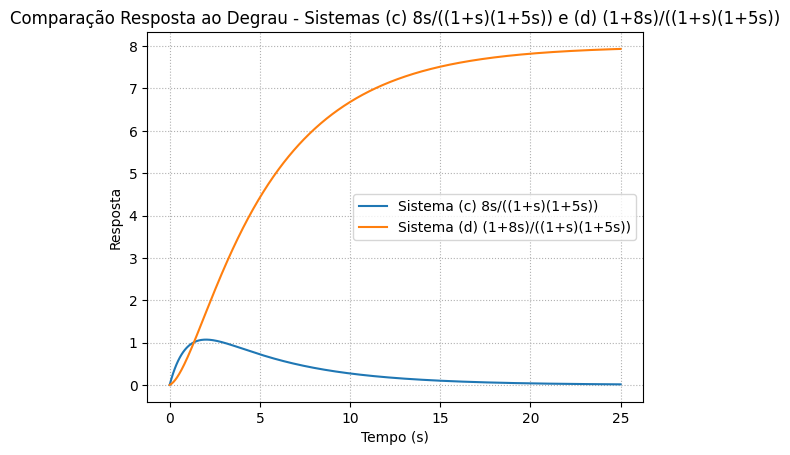

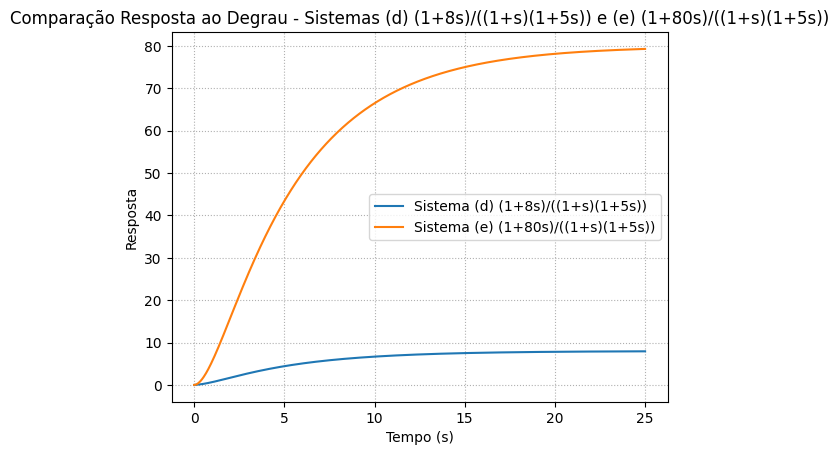

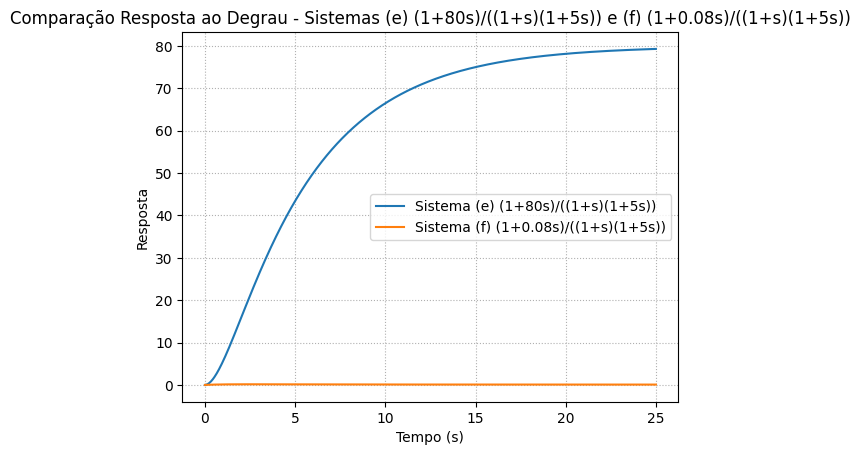

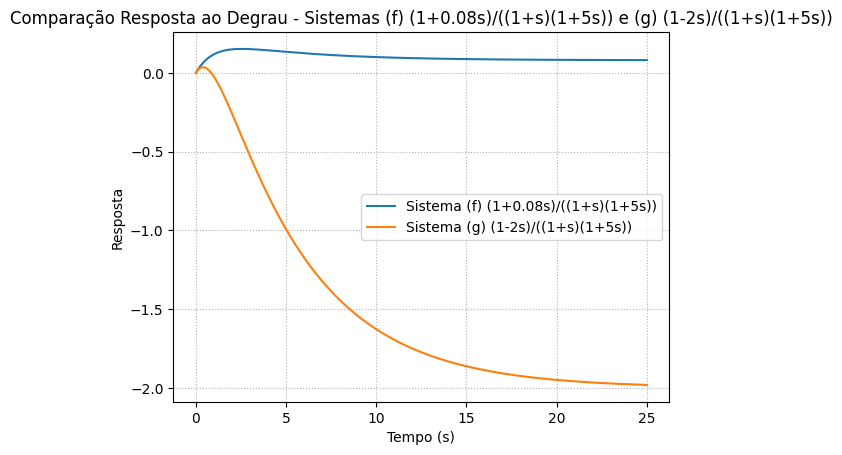

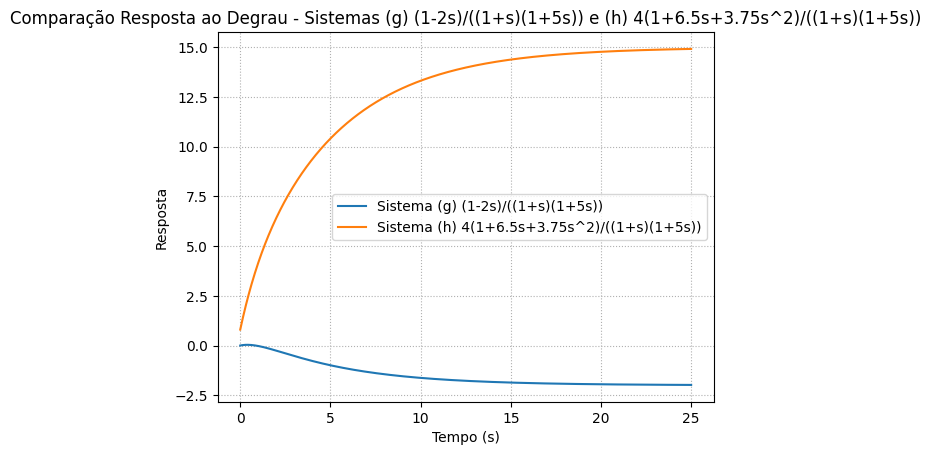

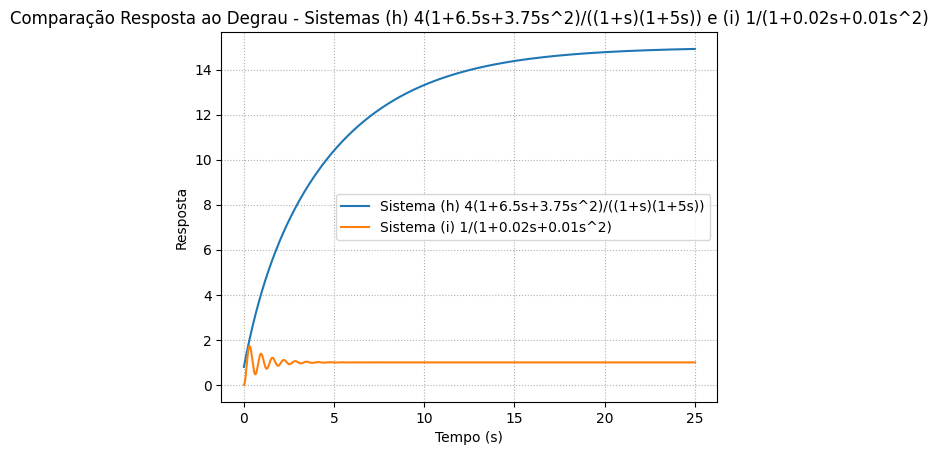

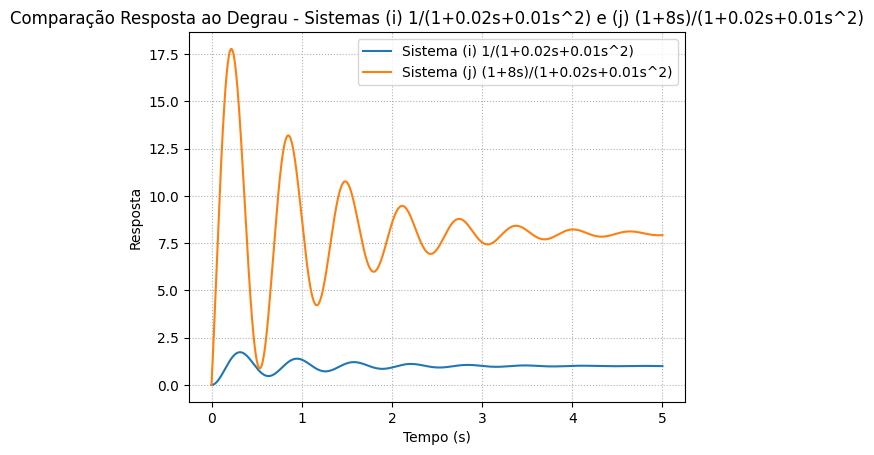

In [88]:
# comparacao das respostas ao degrau com o sistema anterior
keys = list(systems.keys())
for i in range(1, len(keys)):
    k_prev = keys[i-1]
    k_curr = keys[i]
    num1, den1 = systems[k_prev]
    num2, den2 = systems[k_curr]
    G1 = ctrl.TransferFunction(num1, den1)
    G2 = ctrl.TransferFunction(num2, den2)
    T = auto_eixo_tempo(den1)
    tout1, yout1 = ctrl.step_response(G1, T=T)
    tout1, yout2 = ctrl.step_response(G2, T=T)
    plt.figure();
    plt.plot(tout1, yout1, label=f"Sistema {k_prev}")
    plt.plot(tout1, yout2, label=f"Sistema {k_curr}")
    plt.title(f"Comparação Resposta ao Degrau - Sistemas {k_prev} e {k_curr}")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Resposta")
    plt.legend()
    plt.grid(True, ls=":")
    plt.show()